In [1]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt

alpha = []
energy = []

# folder = 'results_COBYLA_initial_point'
files = os.listdir()
files_aer = [file for file in files if file.startswith('shots')]

def ordenar_por_numero(nombre_archivo):
    # Obtener el número del nombre del archivo
    numero = int(nombre_archivo.split('=')[1].split('.')[0])
    return numero

files_aer = sorted(files_aer, key=ordenar_por_numero)


for index, archivo_csv in enumerate(files_aer):

    alpha.append([])
    energy.append([])

    with open(os.path.join(archivo_csv), 'r') as file:
        reader = csv.reader(file)
        next(reader)
        for row in reader:
            alpha[index].append(float(row[0]))
            energy[index].append(float(row[1]))
            

files_names = [file.split('.')[0] for file in files_aer]

In [2]:
files_names

['shots=1024', 'shots=16384']

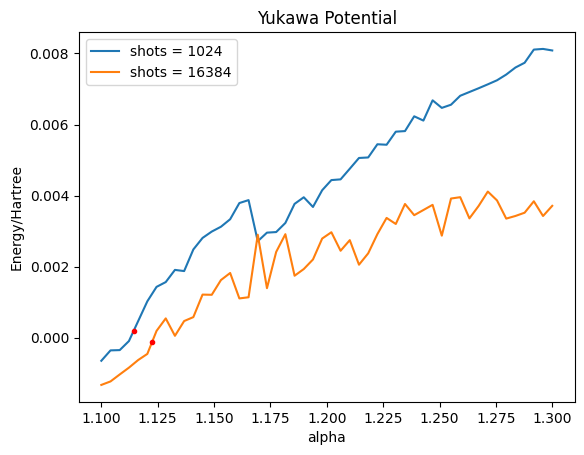

In [3]:
critical_points = []
critical_energies = []

for i in range(len(alpha)):
    critical_points.append([])
    critical_energies.append([])

    plt.plot(alpha[i], energy[i], marker='', linestyle='-', label=f'shots = {files_names[i].split("=")[1]}')

    for j in range(len(alpha[i]) - 1):
        if energy[i][j] * energy[i][j+1] < 0:
            critical_point = 1/2 * (alpha[i][j] + alpha[i][j+1])
            critical_energy = 1/2 * (energy[i][j] + energy[i][j+1])

            critical_points[i].append(critical_point)
            critical_energies[i].append(critical_energy)

            plt.plot(critical_point, critical_energy, marker='.', linestyle='-', color='red')

plt.xlabel('alpha')
plt.ylabel('Energy/Hartree')
plt.title('Yukawa Potential')
plt.legend()
plt.savefig(f'yukawa_critical_point')
plt.show()

In [4]:
critical_points

[[1.1142857142857143], [1.1224489795918369]]

In [5]:
critical_energies

[[0.00018683883493511078], [-0.00013075349655259803]]